In [ ]:
#pip uninstall opencv-python

In [ ]:
#pip install opencv-python

In [ ]:
#!pip install mediapipe opencv-python

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import copy
#from get_mirror_landmark import mirror_landmark
from PIL import ImageFont, ImageDraw, Image

mp_drawing = mp.solutions.drawing_utils # 관절 시각화
mp_pose = mp.solutions.pose # pose 모델
WindowName = 'Mediapipe Window'

---

# 재활운동에 적용.
## 주의 : 좌우반전이라 landmark와 변수의 좌우가 반대임.

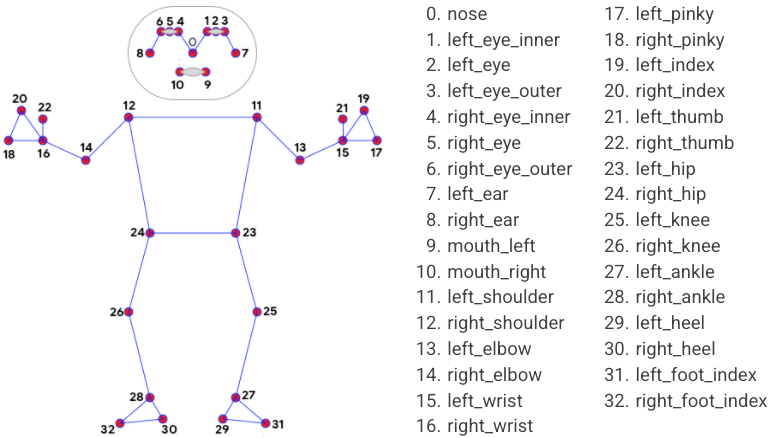

In [2]:
# 좌우반전 landmark
def get_mirror_landmark(landmarks):
    m_landmark = {}
    m_landmark['nose'] = [landmarks[mp_pose.PoseLandmark.NOSE.value].x,landmarks[mp_pose.PoseLandmark.NOSE.value].y]
    m_landmark['left_eye_inner'] = [landmarks[mp_pose.PoseLandmark.RIGHT_EYE_INNER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_EYE_INNER.value].y]
    m_landmark['left_eye'] = [landmarks[mp_pose.PoseLandmark.RIGHT_EYE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_EYE.value].y]
    m_landmark['left_eye_outer'] = [landmarks[mp_pose.PoseLandmark.RIGHT_EYE_OUTER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_EYE_OUTER.value].y]
    m_landmark['right_eye_inner'] = [landmarks[mp_pose.PoseLandmark.LEFT_EYE_INNER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_EYE_INNER.value].y]
    m_landmark['right_eye'] = [landmarks[mp_pose.PoseLandmark.LEFT_EYE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_EYE.value].y]
    m_landmark['right_eye_outer'] = [landmarks[mp_pose.PoseLandmark.LEFT_EYE_OUTER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_EYE_OUTER.value].y]

    m_landmark['left_ear'] = [landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value].y]
    m_landmark['right_ear'] = [landmarks[mp_pose.PoseLandmark.LEFT_EAR.value].x,landmarks[mp_pose.PoseLandmark.LEFT_EAR.value].y]
    m_landmark['left_mouth'] = [landmarks[mp_pose.PoseLandmark.MOUTH_RIGHT.value].x,landmarks[mp_pose.PoseLandmark.MOUTH_RIGHT.value].y]
    m_landmark['right_mouth'] = [landmarks[mp_pose.PoseLandmark.MOUTH_LEFT.value].x,landmarks[mp_pose.PoseLandmark.MOUTH_LEFT.value].y]

    m_landmark['left_shoulder'] = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
    m_landmark['right_shoulder'] = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
    m_landmark['left_elbow'] = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
    m_landmark['right_elbow'] = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
    m_landmark['left_wrist'] = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
    m_landmark['right_wrist'] = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

    m_landmark['left_pinky'] = [landmarks[mp_pose.PoseLandmark.RIGHT_PINKY.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_PINKY.value].y]
    m_landmark['right_pinky'] = [landmarks[mp_pose.PoseLandmark.LEFT_PINKY.value].x,landmarks[mp_pose.PoseLandmark.LEFT_PINKY.value].y]
    m_landmark['left_thumb'] = [landmarks[mp_pose.PoseLandmark.RIGHT_THUMB.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_THUMB.value].y]
    m_landmark['right_thumb'] = [landmarks[mp_pose.PoseLandmark.LEFT_THUMB.value].x,landmarks[mp_pose.PoseLandmark.LEFT_THUMB.value].y]

    m_landmark['left_hip'] = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
    m_landmark['right_hip'] = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
    m_landmark['left_knee'] = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
    m_landmark['right_knee'] = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
    m_landmark['left_ankle'] = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
    m_landmark['right_ankle'] = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
    m_landmark['left_heel'] = [landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].y]
    m_landmark['right_heel'] = [landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].y]
    m_landmark['left_foot_index'] = [landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].y]
    m_landmark['right_foot_index'] = [landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value].x,landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value].y]

    return m_landmark

In [3]:
# 세 관절의 각도 계산
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi) # radian을 degree로 변환
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

# 1. 어깨 - 능동외전

In [11]:
def Shoulder_OuterUP_eval(landmarks, side) :
    global counter, pose_grade, pose_grade_count

    if side == 'left':
        left_hip = get_mirror_landmark(landmarks)['left_hip']
        left_shoulder = get_mirror_landmark(landmarks)['left_shoulder']
        left_elbow = get_mirror_landmark(landmarks)['left_elbow']
        angle = calculate_angle(left_hip, left_shoulder, left_elbow)
            
    elif side == 'right':
        right_hip = get_mirror_landmark(landmarks)['right_hip']
        right_shoulder = get_mirror_landmark(landmarks)['right_shoulder']
        right_elbow = get_mirror_landmark(landmarks)['right_elbow']
        angle = calculate_angle(right_hip, right_shoulder, right_elbow)
        
        
    # 자세 평가
    if (angle < 30) and (pose_grade!='attention'):
        pose_grade = 'attention'
    elif (angle >= 30 and angle < 90) and (pose_grade=='attention'):
        pose_grade = 'Bad'
        pose_grade_count['bad'] += 1
        counter['total'] += 1
    elif (angle >= 90 and angle < 130) and (pose_grade=='Bad'):
        pose_grade = 'Not Bad'
        pose_grade_count['bad'] -= 1
        pose_grade_count['notbad'] += 1
        counter['valid'] += 1
    elif (angle >= 130 and angle < 160) and (pose_grade=='Not Bad'):
        pose_grade = 'Good'
        pose_grade_count['notbad'] -= 1
        pose_grade_count['good'] += 1
    elif (angle >= 160) and (pose_grade=='Good'):
        pose_grade = 'Perfect!'
        pose_grade_count['good'] -= 1
        pose_grade_count['perfect'] += 1
         
    return angle, counter, pose_grade, pose_grade_count

In [12]:
cam_width, cam_height = 640, 480
pose_grade = None
pose_grade_count = {
        'bad' : 0,
        'notbad' : 0,
        'good' : 0,
        'perfect' : 0
        }
counter = {
    'total' : 0,
    'valid' : 0
    }
    
def Shoulder_OuterUP(side):

    ## Setup mediapipe instance
    cap = cv2.VideoCapture(0)
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()

            # Recolor image to RGB
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image = cv2.flip(image, 1)  # 좌우반전(거울모드)
            image.flags.writeable = False

            # Detection
            results = pose.process(image)

            # Recolor back to BGR
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)


            try:
                # 각도 계산
                landmarks = results.pose_landmarks.landmark
                angle, counter, pose_grade, pose_grade_count = shoulder_OuterUP_eval(landmarks, side)


                # 각도 시각화
                cv2.putText(image, str(round(angle)), 
                            tuple(np.multiply(get_mirror_landmark(landmarks)[f'{side}_shoulder'], [cam_width, cam_height]).astype(int)), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

            except:
                pass

            # 카운팅 박스
            cv2.rectangle(image, pt1=(0,0), pt2=(225,73), color=(245,117,16), thickness=-1)

            # 카운팅 박스 텍스트
            #draw.text((0, 0), str('텍스트 테스트'),(0,0,255), font=font)
            cv2.putText(image, text='count', org=(15,12), 
                        fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=0.5, 
                        color=(0,0,0), thickness=1, lineType=cv2.LINE_AA)
            cv2.putText(image, text=str(counter['valid']), org=(10,60), 
                        fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=2, 
                        color=(255,255,255), thickness=2, lineType=cv2.LINE_AA)

            # 자세 평가 텍스트
            cv2.putText(image, 'pose_grade', (65,12), 
                        cv2.FONT_HERSHEY_DUPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image, pose_grade, 
                        (60,60), 
                        cv2.FONT_HERSHEY_DUPLEX, 1, (255,255,255), 2, cv2.LINE_AA)


            # 관절 시각화
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                    mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                    mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                     )               

            cv2.imshow(WindowName, image)

            # 창 닫기
            if cv2.waitKey(10) & 0xFF in [ord('q'), ord('Q'), ord('ㅂ')]: # quiet
                break
            elif cv2.getWindowProperty(WindowName, cv2.WND_PROP_VISIBLE) <1: # X button 클릭으로 닫기
                break

        cap.release()
        cv2.destroyAllWindows()

    return counter, pose_grade_count
    

In [13]:
counter, pose_grade_count = Shoulder_OuterUP(side='left')

# 최종 결과    
print('[Total Count]:', counter['total'], '\n'
      '[Valid Count]:', counter['valid'], '\n'
      'Bad     :', pose_grade_count['bad'], '\n'
      'Not Bad :', pose_grade_count['notbad'], '\n'
      'Good    :', pose_grade_count['good'], '\n'
      'Perfect :', pose_grade_count['perfect'])

[Total Count]: 3 
[Valid Count]: 2 
Bad     : 1 
Not Bad : 0 
Good    : 0 
Perfect : 2


# 2. 어깨 - 능동전방굴곡(45도)

In [68]:
def Shoulder_FrontCurl_eval(landmarks, side) :
    global counter, pose_grade, pose_grade_count

    if side == 'left':
        left_hip = get_mirror_landmark(landmarks)['left_hip']
        left_shoulder = get_mirror_landmark(landmarks)['left_shoulder']
        left_elbow = get_mirror_landmark(landmarks)['left_elbow']
        angle = calculate_angle(left_hip, left_shoulder, left_elbow)
            
    elif side == 'right':
        right_hip = get_mirror_landmark(landmarks)['right_hip']
        right_shoulder = get_mirror_landmark(landmarks)['right_shoulder']
        right_elbow = get_mirror_landmark(landmarks)['right_elbow']
        angle = calculate_angle(right_hip, right_shoulder, right_elbow)
        
        
    # 자세 평가
    if (angle < 25) and (pose_grade!='attention'):
        pose_grade = 'attention'
    elif (angle >= 25 and angle < 70) and (pose_grade=='attention'):
        pose_grade = 'Bad'
        pose_grade_count['bad'] += 1
        counter['total'] += 1
    elif (angle >= 70 and angle < 150) and (pose_grade=='Bad'):
        pose_grade = 'Not Bad'
        pose_grade_count['bad'] -= 1
        pose_grade_count['notbad'] += 1
        counter['valid'] += 1
    elif (angle >= 150 and angle < 170) and (pose_grade=='Not Bad'):
        pose_grade = 'Good'
        pose_grade_count['notbad'] -= 1
        pose_grade_count['good'] += 1
    elif (angle >= 170) and (pose_grade=='Good'):
        pose_grade = 'Perfect!'
        pose_grade_count['good'] -= 1
        pose_grade_count['perfect'] += 1
         
    return angle, counter, pose_grade, pose_grade_count

In [69]:
cam_width, cam_height = 640, 480
pose_grade = None
pose_grade_count = {
        'bad' : 0,
        'notbad' : 0,
        'good' : 0,
        'perfect' : 0
        }
counter = {
    'total' : 0,
    'valid' : 0
    }
    
def Shoulder_FrontCurl(side):

    ## Setup mediapipe instance
    cap = cv2.VideoCapture(0)
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()

            # Recolor image to RGB
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image = cv2.flip(image, 1)  # 좌우반전(거울모드)
            image.flags.writeable = False

            # Detection
            results = pose.process(image)

            # Recolor back to BGR
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)


            try:
                # 각도 계산
                landmarks = results.pose_landmarks.landmark
                angle, counter, pose_grade, pose_grade_count = Shoulder_FrontCurl_eval(landmarks, side)


                # 각도 시각화
                cv2.putText(image, str(round(angle)), 
                            tuple(np.multiply(get_mirror_landmark(landmarks)[f'{side}_shoulder'], [cam_width, cam_height]).astype(int)), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

            except:
                pass

            # 카운팅 박스
            cv2.rectangle(image, pt1=(0,0), pt2=(225,73), color=(245,117,16), thickness=-1)

            # 카운팅 박스 텍스트
            #draw.text((0, 0), str('텍스트 테스트'),(0,0,255), font=font)
            cv2.putText(image, text='count', org=(15,12), 
                        fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=0.5, 
                        color=(0,0,0), thickness=1, lineType=cv2.LINE_AA)
            cv2.putText(image, text=str(counter['valid']), org=(10,60), 
                        fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=2, 
                        color=(255,255,255), thickness=2, lineType=cv2.LINE_AA)

            # 자세 평가 텍스트
            cv2.putText(image, 'pose_grade', (65,12), 
                        cv2.FONT_HERSHEY_DUPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image, pose_grade, 
                        (60,60), 
                        cv2.FONT_HERSHEY_DUPLEX, 1, (255,255,255), 2, cv2.LINE_AA)


            # 관절 시각화
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                    mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                    mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                     )               

            cv2.imshow(WindowName, image)

            # 창 닫기
            if cv2.waitKey(10) & 0xFF in [ord('q'), ord('Q'), ord('ㅂ')]: # quiet
                break
            elif cv2.getWindowProperty(WindowName, cv2.WND_PROP_VISIBLE) <1: # X button 클릭으로 닫기
                break

        cap.release()
        cv2.destroyAllWindows()

    return counter, pose_grade_count
    

In [70]:
counter, pose_grade_count = Shoulder_FrontCurl(side='left')

# 최종 결과    
print('[Total Count]:', counter['total'], '\n'
      '[Valid Count]:', counter['valid'], '\n'
      'Bad     :', pose_grade_count['bad'], '\n'
      'Not Bad :', pose_grade_count['notbad'], '\n'
      'Good    :', pose_grade_count['good'], '\n'
      'Perfect :', pose_grade_count['perfect'])

[Total Count]: 13 
[Valid Count]: 6 
Bad     : 7 
Not Bad : 3 
Good    : 1 
Perfect : 2


# 3. 무릎 - 스쿼트(측면)

In [25]:
def Knee_Squat_side_eval(landmarks, side, counter_, pose_grade_, pose_grade_count_) :
    #global counter, pose_grade, pose_grade_count

    if side == 'left':
        left_hip = get_mirror_landmark(landmarks)['left_hip']
        left_knee = get_mirror_landmark(landmarks)['left_knee']
        left_ankle = get_mirror_landmark(landmarks)['left_ankle']
        angle = calculate_angle(left_hip, left_knee, left_ankle)
        
    elif side == 'right':
        right_hip = get_mirror_landmark(landmarks)['right_hip']
        right_knee = get_mirror_landmark(landmarks)['right_knee']
        right_ankle = get_mirror_landmark(landmarks)['right_ankle']
        angle = calculate_angle(right_hip, right_knee, right_ankle)

        
    # 자세 평가
    if (angle >= 165) and (pose_grade_!='attention'):
        pose_grade_ = 'attention'
    elif (angle >= 130 and angle < 165) and (pose_grade_=='attention'):
        pose_grade_ = 'Bad'
        pose_grade_count_['bad'] += 1
        counter_['total'] += 1
    elif (angle >= 110 and angle < 130) and (pose_grade_=='Bad'):
        pose_grade_ = 'Not Bad'
        pose_grade_count_['bad'] -= 1
        pose_grade_count_['notbad'] += 1
        counter_['valid'] += 1
    elif (angle >= 90 and angle < 110) and (pose_grade_=='Not Bad'):
        pose_grade_ = 'Good'
        pose_grade_count_['notbad'] -= 1
        pose_grade_count_['good'] += 1
    elif (angle < 90) and (pose_grade_=='Good'):
        pose_grade_ = 'Perfect!'
        pose_grade_count_['good'] -= 1
        pose_grade_count_['perfect'] += 1
         
    return angle, counter_, pose_grade_, pose_grade_count_

In [26]:
cam_width, cam_height = 640, 480
pose_grade = None
pose_grade_count = {
        'bad' : 0,
        'notbad' : 0,
        'good' : 0,
        'perfect' : 0
        }
counter = {
    'total' : 0,
    'valid' : 0
    }

    
def Knee_Squat_side(side):
    counter_ = copy.deepcopy(counter)
    pose_grade_ = copy.deepcopy(pose_grade)
    pose_grade_count_ = copy.deepcopy(pose_grade_count)
    

    ## Setup mediapipe instance
    cap = cv2.VideoCapture(0)
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()

            # Recolor image to RGB
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image = cv2.flip(image, 1)  # 좌우반전(거울모드)
            image.flags.writeable = False

            # Detection
            results = pose.process(image)

            # Recolor back to BGR
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)


            try:
                # 각도 계산
                landmarks = results.pose_landmarks.landmark
                angle, counter_, pose_grade_, pose_grade_count_ = Knee_Squat_side_eval(landmarks, side, counter_, pose_grade_, pose_grade_count_)


                # 각도 시각화
                cv2.putText(image, str(round(angle)), 
                            tuple(np.multiply(get_mirror_landmark(landmarks)[f'{side}_knee'], [cam_width, cam_height]).astype(int)), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

            except:
                pass

            # 카운팅 박스
            cv2.rectangle(image, pt1=(0,0), pt2=(225,73), color=(245,117,16), thickness=-1)

            # 카운팅 박스 텍스트
            #draw.text((0, 0), str('텍스트 테스트'),(0,0,255), font=font)
            cv2.putText(image, text='count', org=(15,12), 
                        fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=0.5, 
                        color=(0,0,0), thickness=1, lineType=cv2.LINE_AA)
            cv2.putText(image, text=str(counter_['valid']), org=(10,60), 
                        fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=2, 
                        color=(255,255,255), thickness=2, lineType=cv2.LINE_AA)

            # 자세 평가 텍스트
            cv2.putText(image, 'Pose Grade', (65,12), 
                        cv2.FONT_HERSHEY_DUPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image, pose_grade_, 
                        (60,60), 
                        cv2.FONT_HERSHEY_DUPLEX, 1, (255,255,255), 2, cv2.LINE_AA)


            # 관절 시각화
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                    mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                    mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                     )               

            cv2.imshow(WindowName, image)

            # 창 닫기
            if cv2.waitKey(10) & 0xFF in [ord('q'), ord('Q'), ord('ㅂ')]: # quiet
                break
            elif cv2.getWindowProperty(WindowName, cv2.WND_PROP_VISIBLE) <1: # X button 클릭으로 닫기
                break

        cap.release()
        cv2.destroyAllWindows()

    return counter_, pose_grade_count_
    

In [27]:
counter, pose_grade_count = Knee_Squat_side(side='left')
, side, counter_, pose_grade_, pose_grade_count_
# 최종 결과    
print('[Total Count]:', counter['total'], '\n'
      '[Valid Count]:', counter['valid'], '\n'
      'Bad     :', pose_grade_count['bad'], '\n'
      'Not Bad :', pose_grade_count['notbad'], '\n'
      'Good    :', pose_grade_count['good'], '\n'
      'Perfect :', pose_grade_count['perfect'])

[Total Count]: 16 
[Valid Count]: 7 
Bad     : 9 
Not Bad : 1 
Good    : 1 
Perfect : 5


# 4. 무릎 - 스쿼트(정면)

In [58]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        except:
            pass
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

[x: 0.07498385012149811
y: 0.841795027256012
z: 0.03353819251060486
visibility: 0.9018005132675171
, x: 0.06251277029514313
y: 0.8442324995994568
z: 0.00885860063135624
visibility: 0.8907649517059326
, x: 0.062039922922849655
y: 0.8434976935386658
z: 0.008833448402583599
visibility: 0.8716945648193359
, x: 0.06168213486671448
y: 0.8427034020423889
z: 0.008854618296027184
visibility: 0.9013014435768127
, x: 0.06100647523999214
y: 0.843809962272644
z: 0.033471811562776566
visibility: 0.8887601494789124
, x: 0.05980461835861206
y: 0.8432132601737976
z: 0.03343306854367256
visibility: 0.8699612021446228
, x: 0.058589160442352295
y: 0.8425876498222351
z: 0.03316007927060127
visibility: 0.9106835126876831
, x: 0.06079472228884697
y: 0.8323150873184204
z: -0.05755237489938736
visibility: 0.8258368372917175
, x: 0.0559573657810688
y: 0.8319848775863647
z: 0.05024133250117302
visibility: 0.8624136447906494
, x: 0.08367535471916199
y: 0.8331694006919861
z: 0.014041749760508537
visibility: 0.8592

[x: 0.4159301817417145
y: 0.12946802377700806
z: -2.046227216720581
visibility: 0.9431968331336975
, x: 0.4549742639064789
y: 0.035818617790937424
z: -2.030212640762329
visibility: 0.9370637536048889
, x: 0.48375821113586426
y: 0.0343441404402256
z: -2.030515193939209
visibility: 0.9271526336669922
, x: 0.5112358331680298
y: 0.01642678678035736
z: -2.031322717666626
visibility: 0.9419203400611877
, x: 0.3818441331386566
y: 0.02168852649629116
z: -2.0194289684295654
visibility: 0.9351692795753479
, x: 0.3533968925476074
y: 0.011373849585652351
z: -2.0197386741638184
visibility: 0.9256634712219238
, x: 0.32538697123527527
y: -0.0004259537672623992
z: -2.0203044414520264
visibility: 0.9474250674247742
, x: 0.5472992062568665
y: -0.0007715781684964895
z: -1.724365234375
visibility: 0.9015793800354004
, x: 0.3052685856819153
y: -0.04305491968989372
z: -1.6697351932525635
visibility: 0.9212320446968079
, x: 0.4525090157985687
y: 0.16455453634262085
z: -1.914214849472046
visibility: 0.9205664

[x: 0.45461305975914
y: 0.09953755885362625
z: -2.358975410461426
visibility: 0.9642927050590515
, x: 0.4932781159877777
y: -0.0047852699644863605
z: -2.319178581237793
visibility: 0.961479127407074
, x: 0.5197657346725464
y: -0.006956478580832481
z: -2.3196301460266113
visibility: 0.955514669418335
, x: 0.5467509627342224
y: -0.01060357317328453
z: -2.320491075515747
visibility: 0.9645137786865234
, x: 0.4102505147457123
y: -0.01093850564211607
z: -2.323577880859375
visibility: 0.9598821997642517
, x: 0.37764498591423035
y: -0.016720378771424294
z: -2.324002504348755
visibility: 0.9539607763290405
, x: 0.3504475951194763
y: -0.02279999479651451
z: -2.324364423751831
visibility: 0.9672349691390991
, x: 0.5941214561462402
y: -0.02460641600191593
z: -1.8986866474151611
visibility: 0.9403614401817322
, x: 0.3100152611732483
y: -0.035354796797037125
z: -1.9132003784179688
visibility: 0.9511545300483704
, x: 0.4888452887535095
y: 0.17088499665260315
z: -2.1809334754943848
visibility: 0.9515

[x: 0.4563748836517334
y: 0.125292107462883
z: -2.7584240436553955
visibility: 0.9727515578269958
, x: 0.5028355717658997
y: 0.00503917271271348
z: -2.729210376739502
visibility: 0.9714167714118958
, x: 0.533538281917572
y: 0.0004565489653032273
z: -2.7296180725097656
visibility: 0.9674322009086609
, x: 0.5646316409111023
y: -0.0020874415058642626
z: -2.7303409576416016
visibility: 0.9738509058952332
, x: 0.41385331749916077
y: 0.005173217970877886
z: -2.7366063594818115
visibility: 0.968427836894989
, x: 0.38000035285949707
y: -0.00029559031827375293
z: -2.7370660305023193
visibility: 0.9633681774139404
, x: 0.3349108397960663
y: -0.01812831498682499
z: -2.737614870071411
visibility: 0.9728060364723206
, x: 0.6132834553718567
y: -0.022889185696840286
z: -2.267068862915039
visibility: 0.9559095501899719
, x: 0.2904964089393616
y: -0.035002171993255615
z: -2.29860782623291
visibility: 0.958777904510498
, x: 0.4993419051170349
y: 0.19425104558467865
z: -2.552722692489624
visibility: 0.96

[x: 0.4621756076812744
y: 0.035522300750017166
z: -2.6209235191345215
visibility: 0.9760487675666809
, x: 0.5198362469673157
y: -0.09064122289419174
z: -2.5877397060394287
visibility: 0.9740423560142517
, x: 0.5541209578514099
y: -0.09206067770719528
z: -2.588078022003174
visibility: 0.9707446694374084
, x: 0.5882635116577148
y: -0.09548637270927429
z: -2.588747501373291
visibility: 0.9753909707069397
, x: 0.42889657616615295
y: -0.08719483762979507
z: -2.5905492305755615
visibility: 0.9708366394042969
, x: 0.3951212167739868
y: -0.09093628078699112
z: -2.590984344482422
visibility: 0.966667115688324
, x: 0.3601765036582947
y: -0.09779561311006546
z: -2.5914783477783203
visibility: 0.9739511609077454
, x: 0.6437419056892395
y: -0.09321538358926773
z: -2.160733938217163
visibility: 0.9583435654640198
, x: 0.29403156042099
y: -0.0954756960272789
z: -2.1729624271392822
visibility: 0.9608243107795715
, x: 0.5202000141143799
y: 0.13919290900230408
z: -2.435842990875244
visibility: 0.9642350

[x: 0.48654961585998535
y: 0.03221195191144943
z: -2.904012680053711
visibility: 0.9728561043739319
, x: 0.541599452495575
y: -0.07822626084089279
z: -2.8644115924835205
visibility: 0.968004047870636
, x: 0.5756792426109314
y: -0.08239235728979111
z: -2.864811897277832
visibility: 0.9665536284446716
, x: 0.6096805334091187
y: -0.08630727976560593
z: -2.8654963970184326
visibility: 0.9688331484794617
, x: 0.4504978656768799
y: -0.0773068517446518
z: -2.8717894554138184
visibility: 0.9620726704597473
, x: 0.416576087474823
y: -0.08127529174089432
z: -2.8722524642944336
visibility: 0.9592202305793762
, x: 0.3828618824481964
y: -0.08527588844299316
z: -2.872684955596924
visibility: 0.9624829888343811
, x: 0.6649249792098999
y: -0.08627572655677795
z: -2.380295753479004
visibility: 0.9465817213058472
, x: 0.31475019454956055
y: -0.08533880114555359
z: -2.410579204559326
visibility: 0.9490512609481812
, x: 0.5389426946640015
y: 0.1440221220254898
z: -2.694809675216675
visibility: 0.945298314

[x: 0.5028749704360962
y: 0.028258051723241806
z: -2.3852477073669434
visibility: 0.9725849032402039
, x: 0.5537832975387573
y: -0.09420296549797058
z: -2.346993923187256
visibility: 0.9706248044967651
, x: 0.5785936713218689
y: -0.06426442414522171
z: -2.3474104404449463
visibility: 0.9690539240837097
, x: 0.6190510988235474
y: -0.07909175008535385
z: -2.348196506500244
visibility: 0.9718263149261475
, x: 0.4629892408847809
y: -0.10511255264282227
z: -2.3401129245758057
visibility: 0.9645642638206482
, x: 0.4141252636909485
y: -0.09941434115171432
z: -2.3406078815460205
visibility: 0.9610281586647034
, x: 0.38749682903289795
y: -0.0920049175620079
z: -2.3412134647369385
visibility: 0.964931845664978
, x: 0.6740164160728455
y: -0.06046406924724579
z: -1.9503180980682373
visibility: 0.9539737701416016
, x: 0.3516644537448883
y: -0.06539875268936157
z: -1.9131771326065063
visibility: 0.9523201584815979
, x: 0.5492588877677917
y: 0.1368953436613083
z: -2.2177937030792236
visibility: 0.948

[x: 0.502158522605896
y: 0.004884356167167425
z: -2.051046371459961
visibility: 0.9752424955368042
, x: 0.5395190715789795
y: -0.13390658795833588
z: -2.035918951034546
visibility: 0.9725453853607178
, x: 0.5677252411842346
y: -0.13765019178390503
z: -2.0362486839294434
visibility: 0.9724605679512024
, x: 0.5901890993118286
y: -0.12463431805372238
z: -2.0372886657714844
visibility: 0.975707471370697
, x: 0.46770620346069336
y: -0.1334841251373291
z: -2.0261359214782715
visibility: 0.9663280248641968
, x: 0.4378301501274109
y: -0.12844005227088928
z: -2.026458263397217
visibility: 0.9642525315284729
, x: 0.41051992774009705
y: -0.1316917985677719
z: -2.0270557403564453
visibility: 0.9686182141304016
, x: 0.6275743246078491
y: -0.12893839180469513
z: -1.7332357168197632
visibility: 0.9639527201652527
, x: 0.38759681582450867
y: -0.1569434553384781
z: -1.685129165649414
visibility: 0.9574388861656189
, x: 0.549799919128418
y: 0.06626059859991074
z: -1.9146316051483154
visibility: 0.962700

[x: 0.535230278968811
y: 0.004739874508231878
z: -1.1835907697677612
visibility: 0.9845483899116516
, x: 0.5896096229553223
y: -0.10805805027484894
z: -1.2321374416351318
visibility: 0.9823195934295654
, x: 0.617117166519165
y: -0.10619349032640457
z: -1.2319600582122803
visibility: 0.9822593927383423
, x: 0.6447282433509827
y: -0.10301481187343597
z: -1.2324899435043335
visibility: 0.9843311905860901
, x: 0.521510124206543
y: -0.10648845136165619
z: -1.2161285877227783
visibility: 0.9783835411071777
, x: 0.4978184103965759
y: -0.11347239464521408
z: -1.2162401676177979
visibility: 0.9770576357841492
, x: 0.4744516909122467
y: -0.12031876295804977
z: -1.2167136669158936
visibility: 0.9798317551612854
, x: 0.6877145767211914
y: -0.13080622255802155
z: -1.1258561611175537
visibility: 0.9773351550102234
, x: 0.4516051411628723
y: -0.16245286166667938
z: -1.0368525981903076
visibility: 0.972891092300415
, x: 0.5791980028152466
y: 0.045914728194475174
z: -1.109947919845581
visibility: 0.977

[x: 0.4944276213645935
y: -0.1385338306427002
z: -0.5811837911605835
visibility: 0.9904864430427551
, x: 0.5235226154327393
y: -0.19281579554080963
z: -0.595689058303833
visibility: 0.9876742362976074
, x: 0.5400921702384949
y: -0.19091470539569855
z: -0.5956515073776245
visibility: 0.9877496361732483
, x: 0.556909441947937
y: -0.18939898908138275
z: -0.595643937587738
visibility: 0.9883449077606201
, x: 0.4805445075035095
y: -0.19814373552799225
z: -0.5881076455116272
visibility: 0.9860978126525879
, x: 0.465799480676651
y: -0.20865339040756226
z: -0.5881960391998291
visibility: 0.9855101704597473
, x: 0.44719234108924866
y: -0.2127639800310135
z: -0.5886383056640625
visibility: 0.9869953989982605
, x: 0.5820898413658142
y: -0.183402881026268
z: -0.47232383489608765
visibility: 0.9846944808959961
, x: 0.4378385543823242
y: -0.2105439007282257
z: -0.4373323321342468
visibility: 0.9834556579589844
, x: 0.5163053274154663
y: -0.11725457012653351
z: -0.5178215503692627
visibility: 0.98637

[x: 0.5431130528450012
y: -0.11946174502372742
z: -0.6213076114654541
visibility: 0.9933479428291321
, x: 0.5554725527763367
y: -0.14427265524864197
z: -0.6082992553710938
visibility: 0.9894770383834839
, x: 0.5600284337997437
y: -0.12376788258552551
z: -0.6082785129547119
visibility: 0.9893131256103516
, x: 0.5674001574516296
y: -0.12298694252967834
z: -0.6082238554954529
visibility: 0.9886031150817871
, x: 0.5336591601371765
y: -0.12612423300743103
z: -0.5991756319999695
visibility: 0.9900885820388794
, x: 0.5275062322616577
y: -0.12684664130210876
z: -0.5993083715438843
visibility: 0.9900155067443848
, x: 0.5213467478752136
y: -0.12754741311073303
z: -0.5995410680770874
visibility: 0.9910290241241455
, x: 0.5824643969535828
y: -0.10834327340126038
z: -0.46254897117614746
visibility: 0.9856587648391724
, x: 0.5173734426498413
y: -0.1149420440196991
z: -0.4235571026802063
visibility: 0.9893032908439636
, x: 0.5540111064910889
y: -0.07343873381614685
z: -0.5623130202293396
visibility: 

[x: 0.5470763444900513
y: -0.07070624083280563
z: -0.6053908467292786
visibility: 0.9960426688194275
, x: 0.5573694109916687
y: -0.09342718124389648
z: -0.5888515114784241
visibility: 0.9936649203300476
, x: 0.5676391124725342
y: -0.09169771522283554
z: -0.5888118743896484
visibility: 0.9935728311538696
, x: 0.5746251940727234
y: -0.09075825661420822
z: -0.5887105464935303
visibility: 0.9931290745735168
, x: 0.5389364957809448
y: -0.09933386743068695
z: -0.573834240436554
visibility: 0.9940401315689087
, x: 0.5327056050300598
y: -0.09788861125707626
z: -0.5739443302154541
visibility: 0.9940105080604553
, x: 0.5266722440719604
y: -0.09679707139730453
z: -0.5742952227592468
visibility: 0.9946075677871704
, x: 0.5826234817504883
y: -0.06391718238592148
z: -0.429679811000824
visibility: 0.9912441372871399
, x: 0.5192711353302002
y: -0.07534864544868469
z: -0.40766993165016174
visibility: 0.9934659004211426
, x: 0.5599073171615601
y: -0.03286413475871086
z: -0.5488098859786987
visibility: 0

[x: 0.5348963141441345
y: -0.021281573921442032
z: -0.7627092003822327
visibility: 0.9975919127464294
, x: 0.5462929010391235
y: -0.04827060177922249
z: -0.7427678108215332
visibility: 0.9959703087806702
, x: 0.553257405757904
y: -0.04662928730249405
z: -0.7427129745483398
visibility: 0.9959418773651123
, x: 0.5593891143798828
y: -0.044993601739406586
z: -0.7427276968955994
visibility: 0.9956216812133789
, x: 0.5277296304702759
y: -0.05252375081181526
z: -0.740353524684906
visibility: 0.9962177276611328
, x: 0.5218554735183716
y: -0.05357643589377403
z: -0.7405404448509216
visibility: 0.996256947517395
, x: 0.515919029712677
y: -0.05479646474123001
z: -0.7406660914421082
visibility: 0.9966053366661072
, x: 0.5681836009025574
y: -0.03632583096623421
z: -0.5621246099472046
visibility: 0.9941377639770508
, x: 0.5100768208503723
y: -0.04746714606881142
z: -0.551751971244812
visibility: 0.9957635402679443
, x: 0.546902596950531
y: 0.0011625782353803515
z: -0.6905103921890259
visibility: 0.9

[x: 0.5178366899490356
y: -0.03148479014635086
z: -0.7130458950996399
visibility: 0.9985302090644836
, x: 0.5276926755905151
y: -0.06160948425531387
z: -0.6943743228912354
visibility: 0.9974318742752075
, x: 0.5348052978515625
y: -0.058674488216638565
z: -0.6943372488021851
visibility: 0.9974272847175598
, x: 0.5413891077041626
y: -0.057261910289525986
z: -0.6943650245666504
visibility: 0.9972009658813477
, x: 0.5081828832626343
y: -0.06359940022230148
z: -0.6899163722991943
visibility: 0.9976027011871338
, x: 0.5019195675849915
y: -0.06387419253587723
z: -0.6900758743286133
visibility: 0.997661292552948
, x: 0.4953336715698242
y: -0.0637415274977684
z: -0.6902017593383789
visibility: 0.99786776304245
, x: 0.549750030040741
y: -0.038852669298648834
z: -0.5328850746154785
visibility: 0.9961056709289551
, x: 0.4899998605251312
y: -0.04768320173025131
z: -0.5099995732307434
visibility: 0.9972612261772156
, x: 0.5301748514175415
y: -0.0023055612109601498
z: -0.6479386687278748
visibility: 

[x: 0.5102736353874207
y: -0.011979061178863049
z: -0.6565290689468384
visibility: 0.9990907311439514
, x: 0.5217501521110535
y: -0.040981046855449677
z: -0.6395506262779236
visibility: 0.9983258247375488
, x: 0.5285629034042358
y: -0.04042321443557739
z: -0.6395286321640015
visibility: 0.9983307719230652
, x: 0.534703254699707
y: -0.04026448726654053
z: -0.639537513256073
visibility: 0.9981693625450134
, x: 0.5023003816604614
y: -0.04121050983667374
z: -0.6327735781669617
visibility: 0.9984410405158997
, x: 0.4965304732322693
y: -0.042285408824682236
z: -0.6328973174095154
visibility: 0.9984992146492004
, x: 0.49094611406326294
y: -0.04346885159611702
z: -0.6329975724220276
visibility: 0.9986240267753601
, x: 0.5429078936576843
y: -0.028203023597598076
z: -0.48582592606544495
visibility: 0.9973621368408203
, x: 0.4852694869041443
y: -0.03369162604212761
z: -0.45497727394104004
visibility: 0.998164713382721
, x: 0.5222940444946289
y: 0.009872225113213062
z: -0.595497190952301
visibilit

[x: 0.5096551179885864
y: 0.020452288910746574
z: -0.5802421569824219
visibility: 0.9994410872459412
, x: 0.519914984703064
y: -0.005602935794740915
z: -0.5644104480743408
visibility: 0.9989312291145325
, x: 0.5264622569084167
y: -0.006996677722781897
z: -0.564383327960968
visibility: 0.998930811882019
, x: 0.5327720642089844
y: -0.008135955780744553
z: -0.564359724521637
visibility: 0.9988232851028442
, x: 0.49968594312667847
y: -0.004300357773900032
z: -0.5601508617401123
visibility: 0.9990038871765137
, x: 0.4934123456478119
y: -0.004569697193801403
z: -0.5602411031723022
visibility: 0.9990442991256714
, x: 0.4876771569252014
y: -0.004763101693242788
z: -0.5603293180465698
visibility: 0.9991217255592346
, x: 0.5422271490097046
y: -0.004606755916029215
z: -0.4196532368659973
visibility: 0.9982707500457764
, x: 0.48110467195510864
y: 0.0010887478711083531
z: -0.4008220136165619
visibility: 0.9987987279891968
, x: 0.5225067734718323
y: 0.04083532840013504
z: -0.5220946073532104
visibil

[x: 0.5088551640510559
y: 0.04119567573070526
z: -0.5993496179580688
visibility: 0.9996620416641235
, x: 0.519986629486084
y: 0.015114166773855686
z: -0.5823007225990295
visibility: 0.9993475675582886
, x: 0.5270593166351318
y: 0.014403884299099445
z: -0.582241415977478
visibility: 0.9993451237678528
, x: 0.5329003930091858
y: 0.01404970046132803
z: -0.5821903944015503
visibility: 0.9992778301239014
, x: 0.4975705146789551
y: 0.016972381621599197
z: -0.578656017780304
visibility: 0.9993893504142761
, x: 0.49095240235328674
y: 0.017237406224012375
z: -0.5787474513053894
visibility: 0.9994143843650818
, x: 0.4854172170162201
y: 0.0175666194409132
z: -0.5788093209266663
visibility: 0.9994617104530334
, x: 0.5425415635108948
y: 0.02121933363378048
z: -0.4354313313961029
visibility: 0.9989280700683594
, x: 0.47884124517440796
y: 0.027371840551495552
z: -0.42018014192581177
visibility: 0.9992562532424927
, x: 0.5236164331436157
y: 0.061357058584690094
z: -0.5415915250778198
visibility: 0.999

[x: 0.5063252449035645
y: 0.03825958073139191
z: -0.6542636752128601
visibility: 0.9997916221618652
, x: 0.519128143787384
y: 0.013108877465128899
z: -0.6350261569023132
visibility: 0.9995898008346558
, x: 0.5264140367507935
y: 0.012560660019516945
z: -0.6350166201591492
visibility: 0.9995874166488647
, x: 0.5322698950767517
y: 0.01231895200908184
z: -0.6350137591362
visibility: 0.9995434284210205
, x: 0.4961422383785248
y: 0.013973845168948174
z: -0.6317347288131714
visibility: 0.99961256980896
, x: 0.4894697070121765
y: 0.014015997759997845
z: -0.631837010383606
visibility: 0.9996294975280762
, x: 0.48357057571411133
y: 0.013989970088005066
z: -0.6319147348403931
visibility: 0.9996588230133057
, x: 0.5418452024459839
y: 0.01698548160493374
z: -0.4757593274116516
visibility: 0.9993136525154114
, x: 0.4782981872558594
y: 0.019539404660463333
z: -0.4608772397041321
visibility: 0.9995182156562805
, x: 0.5215381383895874
y: 0.05791352316737175
z: -0.5913829207420349
visibility: 0.99974179

[x: 0.5002598166465759
y: -0.09845080226659775
z: -0.6380497813224792
visibility: 0.9998447895050049
, x: 0.5107337236404419
y: -0.10869123041629791
z: -0.6171984672546387
visibility: 0.9996287226676941
, x: 0.5178077220916748
y: -0.10875974595546722
z: -0.6171721816062927
visibility: 0.9996302127838135
, x: 0.5247447490692139
y: -0.10878365486860275
z: -0.6171949505805969
visibility: 0.9995843768119812
, x: 0.48998552560806274
y: -0.12946023046970367
z: -0.6138386130332947
visibility: 0.9996411800384521
, x: 0.4835212826728821
y: -0.12816007435321808
z: -0.6139721870422363
visibility: 0.9996711015701294
, x: 0.47807058691978455
y: -0.10655538737773895
z: -0.6141585111618042
visibility: 0.9996866583824158
, x: 0.5350506901741028
y: -0.09190801531076431
z: -0.45128577947616577
visibility: 0.9993482232093811
, x: 0.470104455947876
y: -0.0882868617773056
z: -0.4344276785850525
visibility: 0.9995129704475403
, x: 0.5155512094497681
y: -0.05362212285399437
z: -0.5732601881027222
visibility:

[x: 0.5288127660751343
y: -0.08653829991817474
z: -0.6472263932228088
visibility: 0.9998095631599426
, x: 0.5349644422531128
y: -0.10977669060230255
z: -0.6279051899909973
visibility: 0.9993575215339661
, x: 0.5404003262519836
y: -0.10973258316516876
z: -0.6279069185256958
visibility: 0.9993523955345154
, x: 0.545982837677002
y: -0.10955357551574707
z: -0.6279469728469849
visibility: 0.9992504715919495
, x: 0.517661452293396
y: -0.11065980046987534
z: -0.6349352598190308
visibility: 0.9994218945503235
, x: 0.5109007954597473
y: -0.1113203912973404
z: -0.6350326538085938
visibility: 0.9994997382164001
, x: 0.50409334897995
y: -0.1121160089969635
z: -0.6351224780082703
visibility: 0.9995132088661194
, x: 0.545629620552063
y: -0.10101263225078583
z: -0.4421517848968506
visibility: 0.9987478256225586
, x: 0.48598408699035645
y: -0.10412566363811493
z: -0.49632206559181213
visibility: 0.9992581009864807
, x: 0.5356661677360535
y: -0.062201276421546936
z: -0.5775220990180969
visibility: 0.99

[x: 0.5270835757255554
y: -0.10063080489635468
z: -0.591682493686676
visibility: 0.9997525215148926
, x: 0.5338202118873596
y: -0.1220758706331253
z: -0.5712313652038574
visibility: 0.9990670680999756
, x: 0.5395739078521729
y: -0.12116780132055283
z: -0.5712374448776245
visibility: 0.9990593194961548
, x: 0.5453853607177734
y: -0.12086715549230576
z: -0.5713095664978027
visibility: 0.9989012479782104
, x: 0.5159353017807007
y: -0.12582847476005554
z: -0.5757551193237305
visibility: 0.9991602301597595
, x: 0.5090274810791016
y: -0.1225733757019043
z: -0.575837254524231
visibility: 0.99928879737854
, x: 0.5023447871208191
y: -0.12253125011920929
z: -0.5759758949279785
visibility: 0.9993051290512085
, x: 0.5456407070159912
y: -0.10898704081773758
z: -0.3950139582157135
visibility: 0.9981233477592468
, x: 0.48700618743896484
y: -0.11074691265821457
z: -0.4367591440677643
visibility: 0.9989281296730042
, x: 0.5352638959884644
y: -0.07493855804204941
z: -0.5194462537765503
visibility: 0.999

[x: 0.5251729488372803
y: -0.0960954800248146
z: -0.7095335125923157
visibility: 0.9996664524078369
, x: 0.5316342115402222
y: -0.12099356204271317
z: -0.6880741119384766
visibility: 0.9986473917961121
, x: 0.5377150774002075
y: -0.12157037109136581
z: -0.6880632042884827
visibility: 0.9985796213150024
, x: 0.5436893701553345
y: -0.12150154262781143
z: -0.6881118416786194
visibility: 0.998318612575531
, x: 0.5132368206977844
y: -0.12090225517749786
z: -0.6940970420837402
visibility: 0.998846173286438
, x: 0.5050288438796997
y: -0.1225060373544693
z: -0.6942159533500671
visibility: 0.9990188479423523
, x: 0.49729156494140625
y: -0.12298762053251266
z: -0.6943280100822449
visibility: 0.9990606307983398
, x: 0.5447615385055542
y: -0.1105893924832344
z: -0.5019781589508057
visibility: 0.9968940019607544
, x: 0.47998571395874023
y: -0.11175578087568283
z: -0.532623291015625
visibility: 0.9986603260040283
, x: 0.533204972743988
y: -0.07227413356304169
z: -0.6337342262268066
visibility: 0.999

[x: 0.5218496918678284
y: -0.11578579246997833
z: -0.670154333114624
visibility: 0.9995479583740234
, x: 0.5322474837303162
y: -0.14182452857494354
z: -0.6530502438545227
visibility: 0.9981349110603333
, x: 0.5398298501968384
y: -0.1255769282579422
z: -0.6530486941337585
visibility: 0.9980247616767883
, x: 0.5468268394470215
y: -0.12577234208583832
z: -0.6531249284744263
visibility: 0.9977207183837891
, x: 0.510195791721344
y: -0.14587433636188507
z: -0.6597123146057129
visibility: 0.9984815120697021
, x: 0.5050972104072571
y: -0.1242222860455513
z: -0.6598130464553833
visibility: 0.9986509680747986
, x: 0.49720272421836853
y: -0.12410538643598557
z: -0.6599807739257812
visibility: 0.99871826171875
, x: 0.5506553053855896
y: -0.11308509856462479
z: -0.47843146324157715
visibility: 0.9953912496566772
, x: 0.48075586557388306
y: -0.11147219687700272
z: -0.5090311169624329
visibility: 0.9982771873474121
, x: 0.5356859564781189
y: -0.06752943992614746
z: -0.5972475409507751
visibility: 0.9

[x: 0.5675250291824341
y: -0.10916842520236969
z: -0.7231082320213318
visibility: 0.9994039535522461
, x: 0.5768107175827026
y: -0.14106576144695282
z: -0.7141252756118774
visibility: 0.9975734353065491
, x: 0.585281491279602
y: -0.1402243822813034
z: -0.7140622138977051
visibility: 0.997408390045166
, x: 0.5937897562980652
y: -0.13982051610946655
z: -0.7140529155731201
visibility: 0.9969124794006348
, x: 0.5534893870353699
y: -0.14266519248485565
z: -0.7204576730728149
visibility: 0.9980963468551636
, x: 0.5440210103988647
y: -0.14329279959201813
z: -0.7206078767776489
visibility: 0.9982827305793762
, x: 0.5346620082855225
y: -0.14452609419822693
z: -0.720754861831665
visibility: 0.9983049035072327
, x: 0.5977372527122498
y: -0.13068896532058716
z: -0.5442483425140381
visibility: 0.993574857711792
, x: 0.5165601968765259
y: -0.13651534914970398
z: -0.5764613747596741
visibility: 0.998072624206543
, x: 0.5798157453536987
y: -0.08097704499959946
z: -0.6522698402404785
visibility: 0.9996

[x: 0.5837428569793701
y: -0.12666809558868408
z: -0.7311786413192749
visibility: 0.9994001984596252
, x: 0.593530535697937
y: -0.1790933459997177
z: -0.7227731943130493
visibility: 0.9976668953895569
, x: 0.6029208302497864
y: -0.1767571121454239
z: -0.7227643728256226
visibility: 0.9974547028541565
, x: 0.6145533919334412
y: -0.17094938457012177
z: -0.7228075861930847
visibility: 0.997001051902771
, x: 0.5673256516456604
y: -0.18273237347602844
z: -0.7232145071029663
visibility: 0.9982336759567261
, x: 0.5612567663192749
y: -0.16704769432544708
z: -0.7233914732933044
visibility: 0.9984185099601746
, x: 0.5520667433738708
y: -0.15148329734802246
z: -0.7236084342002869
visibility: 0.998465359210968
, x: 0.628242552280426
y: -0.13451774418354034
z: -0.5539261102676392
visibility: 0.9944794178009033
, x: 0.535054087638855
y: -0.14009767770767212
z: -0.5617728233337402
visibility: 0.9984037280082703
, x: 0.5998048782348633
y: -0.09539445489645004
z: -0.6560394167900085
visibility: 0.99963

[x: 0.5863439440727234
y: -0.0606219545006752
z: -0.9889341592788696
visibility: 0.9993880987167358
, x: 0.6043893098831177
y: -0.11546654254198074
z: -0.9811484217643738
visibility: 0.9973240494728088
, x: 0.6185791492462158
y: -0.11644627898931503
z: -0.9810611009597778
visibility: 0.9969432353973389
, x: 0.6331022381782532
y: -0.1175817996263504
z: -0.9810846447944641
visibility: 0.9962771534919739
, x: 0.5665654540061951
y: -0.131350576877594
z: -0.9783626794815063
visibility: 0.9982309937477112
, x: 0.5621171593666077
y: -0.11959519982337952
z: -0.9786516427993774
visibility: 0.9984283447265625
, x: 0.5482795238494873
y: -0.11854015290737152
z: -0.9788920283317566
visibility: 0.9984626770019531
, x: 0.6489897966384888
y: -0.1154937818646431
z: -0.7887098789215088
visibility: 0.9945096969604492
, x: 0.5281599760055542
y: -0.11874232441186905
z: -0.780514121055603
visibility: 0.9984586834907532
, x: 0.6086168885231018
y: -0.03882564976811409
z: -0.9032027125358582
visibility: 0.9995

[x: 0.5764682292938232
y: -0.13147251307964325
z: -1.0379984378814697
visibility: 0.9992295503616333
, x: 0.6019657850265503
y: -0.19187743961811066
z: -1.0110266208648682
visibility: 0.9963982105255127
, x: 0.6168964505195618
y: -0.1812918335199356
z: -1.0111098289489746
visibility: 0.9958358407020569
, x: 0.6330451369285583
y: -0.18165339529514313
z: -1.011142611503601
visibility: 0.9952167272567749
, x: 0.5567041039466858
y: -0.19459491968154907
z: -1.0073997974395752
visibility: 0.9974827766418457
, x: 0.5401269197463989
y: -0.18512395024299622
z: -1.0076391696929932
visibility: 0.9977032542228699
, x: 0.521722674369812
y: -0.18682508170604706
z: -1.0080267190933228
visibility: 0.9978919625282288
, x: 0.6521636843681335
y: -0.1521579623222351
z: -0.7982395887374878
visibility: 0.9936055541038513
, x: 0.4983583390712738
y: -0.1581365168094635
z: -0.7785567045211792
visibility: 0.9977067112922668
, x: 0.6011488437652588
y: -0.05895814672112465
z: -0.9547964930534363
visibility: 0.999

[x: 0.5000478625297546
y: -0.1453055441379547
z: -1.6421937942504883
visibility: 0.9981016516685486
, x: 0.53638756275177
y: -0.24819795787334442
z: -1.6173293590545654
visibility: 0.9923962950706482
, x: 0.5615040063858032
y: -0.25071534514427185
z: -1.6177520751953125
visibility: 0.9937330484390259
, x: 0.5860626101493835
y: -0.24865564703941345
z: -1.6182358264923096
visibility: 0.9929696321487427
, x: 0.4702414572238922
y: -0.24685434997081757
z: -1.6092989444732666
visibility: 0.9904894232749939
, x: 0.44676095247268677
y: -0.24060478806495667
z: -1.6095850467681885
visibility: 0.9925761818885803
, x: 0.42335978150367737
y: -0.23785893619060516
z: -1.6101106405258179
visibility: 0.9911938905715942
, x: 0.6311174035072327
y: -0.2104806751012802
z: -1.3761951923370361
visibility: 0.9901005029678345
, x: 0.39494219422340393
y: -0.2034100741147995
z: -1.3298581838607788
visibility: 0.9891502261161804
, x: 0.5684724450111389
y: -0.04378042742609978
z: -1.5416890382766724
visibility: 0.

[x: 0.4811719059944153
y: 0.07687979191541672
z: -2.5538647174835205
visibility: 0.9782048463821411
, x: 0.5276702046394348
y: -0.0482243187725544
z: -2.5358736515045166
visibility: 0.9400696754455566
, x: 0.5607775449752808
y: -0.0554920993745327
z: -2.53608775138855
visibility: 0.9541383385658264
, x: 0.5912958979606628
y: -0.07000969350337982
z: -2.536404609680176
visibility: 0.9407705664634705
, x: 0.4401625096797943
y: -0.04411522299051285
z: -2.542067527770996
visibility: 0.9344033598899841
, x: 0.40772828459739685
y: -0.04769822210073471
z: -2.5425329208374023
visibility: 0.9499033689498901
, x: 0.3633505702018738
y: -0.12314777076244354
z: -2.54325795173645
visibility: 0.9388240575790405
, x: 0.6358903646469116
y: -0.06866032630205154
z: -2.1416077613830566
visibility: 0.9252564311027527
, x: 0.3161758780479431
y: -0.09473636746406555
z: -2.164226531982422
visibility: 0.9375721216201782
, x: 0.5527304410934448
y: 0.1478070318698883
z: -2.3787572383880615
visibility: 0.955597281

[x: 0.5014055371284485
y: 0.07504912465810776
z: -2.409799575805664
visibility: 0.9569311738014221
, x: 0.5617645978927612
y: -0.09575753659009933
z: -2.3985416889190674
visibility: 0.8938462734222412
, x: 0.5983560681343079
y: -0.06468724459409714
z: -2.398519277572632
visibility: 0.9090143442153931
, x: 0.630026638507843
y: -0.06647704541683197
z: -2.398602247238159
visibility: 0.8876850605010986
, x: 0.4337823987007141
y: -0.11169833689928055
z: -2.408494472503662
visibility: 0.8989366888999939
, x: 0.3898416757583618
y: -0.10672512650489807
z: -2.4089155197143555
visibility: 0.9207748770713806
, x: 0.3485814332962036
y: -0.10850456357002258
z: -2.409299373626709
visibility: 0.9109276533126831
, x: 0.6713818311691284
y: -0.06872528046369553
z: -2.0152997970581055
visibility: 0.8725515007972717
, x: 0.29214954376220703
y: -0.06372617185115814
z: -2.060636520385742
visibility: 0.9087573289871216
, x: 0.5682127475738525
y: 0.20897647738456726
z: -2.234805107116699
visibility: 0.8994206

[x: 0.512239933013916
y: 0.1255275309085846
z: -2.156534194946289
visibility: 0.9711995124816895
, x: 0.5607194304466248
y: -0.09893421083688736
z: -2.1508262157440186
visibility: 0.9311186671257019
, x: 0.5981040596961975
y: -0.017094330862164497
z: -2.150855779647827
visibility: 0.9393042325973511
, x: 0.6411435008049011
y: -0.03733041509985924
z: -2.1510841846466064
visibility: 0.9253543019294739
, x: 0.44220924377441406
y: -0.022881904616951942
z: -2.178633451461792
visibility: 0.9357966184616089
, x: 0.39879119396209717
y: -0.019179344177246094
z: -2.1791911125183105
visibility: 0.9495866298675537
, x: 0.3579912781715393
y: -0.02951784059405327
z: -2.179387092590332
visibility: 0.9438491463661194
, x: 0.6657742261886597
y: -0.056220948696136475
z: -1.8063453435897827
visibility: 0.9163310527801514
, x: 0.26193052530288696
y: -0.03604821488261223
z: -1.9258785247802734
visibility: 0.9432685971260071
, x: 0.5778154134750366
y: 0.2327978014945984
z: -1.9915698766708374
visibility: 0.

[x: 0.47882992029190063
y: 0.09259424358606339
z: -2.3696930408477783
visibility: 0.9773287773132324
, x: 0.5308536291122437
y: -0.07731839269399643
z: -2.370703935623169
visibility: 0.9476577043533325
, x: 0.5733819603919983
y: -0.07339858263731003
z: -2.370612859725952
visibility: 0.9519480466842651
, x: 0.618621826171875
y: -0.08926158398389816
z: -2.3708503246307373
visibility: 0.9409483671188354
, x: 0.41644176840782166
y: -0.05075683072209358
z: -2.382582187652588
visibility: 0.9529554843902588
, x: 0.3730836808681488
y: -0.05298328027129173
z: -2.3831169605255127
visibility: 0.9630933403968811
, x: 0.3302113115787506
y: -0.05018734186887741
z: -2.3836209774017334
visibility: 0.9596590399742126
, x: 0.6550503373146057
y: -0.10198736190795898
z: -1.9973618984222412
visibility: 0.9354225397109985
, x: 0.2576528787612915
y: -0.05520705506205559
z: -2.053468704223633
visibility: 0.9599146842956543
, x: 0.5562417507171631
y: 0.21718765795230865
z: -2.1888322830200195
visibility: 0.946

[x: 0.47121661901474
y: 0.13735763728618622
z: -2.720615863800049
visibility: 0.9294055700302124
, x: 0.5184566378593445
y: -0.014230848290026188
z: -2.7416934967041016
visibility: 0.9040328860282898
, x: 0.5583833456039429
y: -0.03062569908797741
z: -2.741507053375244
visibility: 0.900344967842102
, x: 0.598381519317627
y: -0.04455073922872543
z: -2.7418835163116455
visibility: 0.8907903432846069
, x: 0.4029257893562317
y: -0.02612120471894741
z: -2.7583136558532715
visibility: 0.922224223613739
, x: 0.368406742811203
y: 0.0014086388982832432
z: -2.7589669227600098
visibility: 0.9323786497116089
, x: 0.32693547010421753
y: 0.002676720265299082
z: -2.7593674659729004
visibility: 0.9369841814041138
, x: 0.6482592821121216
y: -0.0804671049118042
z: -2.365408420562744
visibility: 0.8967103362083435
, x: 0.23034551739692688
y: -0.04792064428329468
z: -2.437779426574707
visibility: 0.9458930492401123
, x: 0.5488267540931702
y: 0.23905156552791595
z: -2.526933431625366
visibility: 0.88104641

[x: 0.5173488855361938
y: 0.005251159891486168
z: -2.8257453441619873
visibility: 0.9462697505950928
, x: 0.5953911542892456
y: -0.20508547127246857
z: -2.800179958343506
visibility: 0.9248573780059814
, x: 0.6466508507728577
y: -0.18896540999412537
z: -2.8002710342407227
visibility: 0.9213632941246033
, x: 0.6907870173454285
y: -0.17471006512641907
z: -2.8006014823913574
visibility: 0.9108181595802307
, x: 0.45152878761291504
y: -0.12909001111984253
z: -2.826550006866455
visibility: 0.9411688446998596
, x: 0.399807870388031
y: -0.13570912182331085
z: -2.8272616863250732
visibility: 0.9496998190879822
, x: 0.3489299714565277
y: -0.14111241698265076
z: -2.827504873275757
visibility: 0.9526873826980591
, x: 0.7165507674217224
y: -0.13585062325000763
z: -2.3552117347717285
visibility: 0.9191649556159973
, x: 0.2513163685798645
y: -0.12962670624256134
z: -2.466987133026123
visibility: 0.961714506149292
, x: 0.5874195694923401
y: 0.15174825489521027
z: -2.618865489959717
visibility: 0.90661

[x: 0.6821758151054382
y: 0.190840944647789
z: -2.717966318130493
visibility: 0.9620221257209778
, x: 0.7462180852890015
y: -0.013168592937290668
z: -2.6883022785186768
visibility: 0.9486075639724731
, x: 0.7826235890388489
y: -0.024385476484894753
z: -2.688584089279175
visibility: 0.9464226365089417
, x: 0.8135622143745422
y: -0.03231080248951912
z: -2.689120054244995
visibility: 0.9399422407150269
, x: 0.6158229112625122
y: 0.024190204218029976
z: -2.7369706630706787
visibility: 0.957439661026001
, x: 0.5718724131584167
y: 0.01148141548037529
z: -2.737506151199341
visibility: 0.962874710559845
, x: 0.528838574886322
y: 0.002361146965995431
z: -2.737618923187256
visibility: 0.9649186134338379
, x: 0.8106732368469238
y: 0.006042578257620335
z: -2.1572158336639404
visibility: 0.9441061615943909
, x: 0.3638654351234436
y: -0.04710067808628082
z: -2.415940046310425
visibility: 0.9712186455726624
, x: 0.7007229328155518
y: 0.2841815948486328
z: -2.484363079071045
visibility: 0.932704269886

[x: 0.7052673697471619
y: 0.1337100863456726
z: -2.5519776344299316
visibility: 0.9744478464126587
, x: 0.7738879323005676
y: -0.06141670420765877
z: -2.4948647022247314
visibility: 0.9660685658454895
, x: 0.8095380663871765
y: -0.06280205398797989
z: -2.4951515197753906
visibility: 0.9645381569862366
, x: 0.8365494012832642
y: -0.05847533419728279
z: -2.4957776069641113
visibility: 0.9606914520263672
, x: 0.6416714787483215
y: -0.0673864334821701
z: -2.554288387298584
visibility: 0.9713994860649109
, x: 0.6115251779556274
y: -0.020662479102611542
z: -2.5546021461486816
visibility: 0.9747583866119385
, x: 0.571978747844696
y: -0.030764030292630196
z: -2.5549004077911377
visibility: 0.9763420820236206
, x: 0.8493883013725281
y: -0.0494149811565876
z: -1.9865309000015259
visibility: 0.9625857472419739
, x: 0.4226047098636627
y: -0.07807615399360657
z: -2.2473037242889404
visibility: 0.9804086089134216
, x: 0.7279589176177979
y: 0.21362510323524475
z: -2.3351571559906006
visibility: 0.955

[x: 0.7028824687004089
y: 0.11668688803911209
z: -2.3438913822174072
visibility: 0.9828519821166992
, x: 0.7861985564231873
y: -0.052444446831941605
z: -2.296712636947632
visibility: 0.9775876998901367
, x: 0.8202790021896362
y: -0.05126247555017471
z: -2.296968936920166
visibility: 0.9763006567955017
, x: 0.8514002561569214
y: -0.05470060929656029
z: -2.2974910736083984
visibility: 0.974122166633606
, x: 0.6498962640762329
y: -0.07899493724107742
z: -2.339221477508545
visibility: 0.980785608291626
, x: 0.6052325367927551
y: -0.06946291029453278
z: -2.3396379947662354
visibility: 0.9826638102531433
, x: 0.562015175819397
y: -0.08154166489839554
z: -2.3397438526153564
visibility: 0.9839295744895935
, x: 0.8726961016654968
y: -0.05598010867834091
z: -1.8204376697540283
visibility: 0.9742617011070251
, x: 0.4368430972099304
y: -0.1311708241701126
z: -2.0128259658813477
visibility: 0.9863854646682739
, x: 0.7277762293815613
y: 0.21678167581558228
z: -2.1397080421447754
visibility: 0.970837

[x: 0.7108875513076782
y: 0.10272461920976639
z: -2.5695018768310547
visibility: 0.988702118396759
, x: 0.7996075749397278
y: -0.10418307781219482
z: -2.5089597702026367
visibility: 0.985174834728241
, x: 0.8360821604728699
y: -0.09534134715795517
z: -2.509241819381714
visibility: 0.9841111302375793
, x: 0.8653528094291687
y: -0.08851209282875061
z: -2.5098323822021484
visibility: 0.9827742576599121
, x: 0.6567373871803284
y: -0.13979724049568176
z: -2.550325632095337
visibility: 0.9872614145278931
, x: 0.6082884669303894
y: -0.142385333776474
z: -2.550830364227295
visibility: 0.9883979558944702
, x: 0.566376268863678
y: -0.1447538584470749
z: -2.551081418991089
visibility: 0.9893712401390076
, x: 0.8698108792304993
y: -0.015579033643007278
z: -1.9998996257781982
visibility: 0.9819561243057251
, x: 0.45000189542770386
y: -0.14355765283107758
z: -2.1888787746429443
visibility: 0.9907985925674438
, x: 0.7382898330688477
y: 0.22517596185207367
z: -2.3586769104003906
visibility: 0.98035269

[x: 0.7208614349365234
y: 0.10710868239402771
z: -2.4738874435424805
visibility: 0.9919396638870239
, x: 0.8035825490951538
y: -0.09633757174015045
z: -2.415384531021118
visibility: 0.9896517395973206
, x: 0.838525652885437
y: -0.09635274112224579
z: -2.415733575820923
visibility: 0.988853931427002
, x: 0.8662916421890259
y: -0.09464003145694733
z: -2.4164462089538574
visibility: 0.9879987835884094
, x: 0.6790811419487
y: -0.02441847138106823
z: -2.4764976501464844
visibility: 0.9909195899963379
, x: 0.6402904987335205
y: -0.03752951696515083
z: -2.476956367492676
visibility: 0.9916929602622986
, x: 0.6012688279151917
y: -0.05173102766275406
z: -2.4770798683166504
visibility: 0.9924298524856567
, x: 0.8672052621841431
y: -0.0389242060482502
z: -1.9081443548202515
visibility: 0.9866772294044495
, x: 0.44586458802223206
y: -0.1097254827618599
z: -2.180114984512329
visibility: 0.9933069944381714
, x: 0.7415898442268372
y: 0.21868404746055603
z: -2.2598464488983154
visibility: 0.9856572747

[x: 0.7066551446914673
y: 0.11594929546117783
z: -2.7197251319885254
visibility: 0.9897314310073853
, x: 0.7903777360916138
y: -0.08224055916070938
z: -2.669882297515869
visibility: 0.9885884523391724
, x: 0.8264251947402954
y: -0.08474406599998474
z: -2.6702303886413574
visibility: 0.9873737692832947
, x: 0.8539501428604126
y: -0.08497234433889389
z: -2.671002149581909
visibility: 0.9872996807098389
, x: 0.6562761664390564
y: -0.07331231236457825
z: -2.7139081954956055
visibility: 0.9893902540206909
, x: 0.6070348620414734
y: -0.08649123460054398
z: -2.7143781185150146
visibility: 0.9897199273109436
, x: 0.5574029684066772
y: -0.09608527272939682
z: -2.714555263519287
visibility: 0.9910973906517029
, x: 0.8712965846061707
y: -0.07533199340105057
z: -2.1553566455841064
visibility: 0.9846283197402954
, x: 0.431202232837677
y: -0.12568019330501556
z: -2.350865125656128
visibility: 0.9914389848709106
, x: 0.7315260767936707
y: 0.22323516011238098
z: -2.495952844619751
visibility: 0.982407

[x: 0.6858399510383606
y: 0.17413249611854553
z: -2.5345451831817627
visibility: 0.9836490154266357
, x: 0.7585861682891846
y: -0.01753184013068676
z: -2.5186243057250977
visibility: 0.9812307953834534
, x: 0.79585862159729
y: -0.01848132349550724
z: -2.518730878829956
visibility: 0.9783068299293518
, x: 0.8283543586730957
y: -0.018876751884818077
z: -2.5190670490264893
visibility: 0.9781410694122314
, x: 0.62333083152771
y: 0.020479483529925346
z: -2.5453319549560547
visibility: 0.9837320446968079
, x: 0.5818682909011841
y: 0.008679245598614216
z: -2.546010971069336
visibility: 0.9847572445869446
, x: 0.5420129895210266
y: -0.0038433910813182592
z: -2.5464327335357666
visibility: 0.9877200722694397
, x: 0.8449376225471497
y: 0.01973927579820156
z: -2.107886791229248
visibility: 0.9725292921066284
, x: 0.3989606499671936
y: -0.09530191868543625
z: -2.218430757522583
visibility: 0.9883517026901245
, x: 0.7208627462387085
y: 0.2640378177165985
z: -2.3391592502593994
visibility: 0.9734556

[x: 0.6817474961280823
y: 0.24229122698307037
z: -2.032930612564087
visibility: 0.98951256275177
, x: 0.7695859670639038
y: 0.04403751343488693
z: -2.026991367340088
visibility: 0.987229585647583
, x: 0.8070163726806641
y: 0.05278557911515236
z: -2.0268943309783936
visibility: 0.9856371879577637
, x: 0.8393308520317078
y: 0.05891581252217293
z: -2.0270354747772217
visibility: 0.9848741292953491
, x: 0.6247407793998718
y: 0.04996383562684059
z: -2.0509064197540283
visibility: 0.9891963601112366
, x: 0.5823936462402344
y: 0.03352862223982811
z: -2.0514650344848633
visibility: 0.9902338981628418
, x: 0.5415648818016052
y: 0.017898792400956154
z: -2.051636219024658
visibility: 0.991950273513794
, x: 0.8914862871170044
y: 0.058986879885196686
z: -1.6647361516952515
visibility: 0.9819431900978088
, x: 0.40748533606529236
y: -0.06317095458507538
z: -1.7708791494369507
visibility: 0.9925896525382996
, x: 0.7118865847587585
y: 0.32054054737091064
z: -1.86347234249115
visibility: 0.9826391935348

In [53]:
a

[0.6390326619148254,
 x: 0.6390326619148254
 y: 0.7266363501548767
 z: -2.156679630279541
 visibility: 0.998672366142273]

In [60]:
a = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
b = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
print(a,b)
 
 

[0.6334720849990845, 0.8436326384544373] [0.6199836134910583, 1.0618398189544678]


In [57]:
tuple(np.multiply(get_mirror_landmark(landmarks)['nose'], [cam_width, cam_height]).astype(int))

(408, 348)

In [61]:

def calculate_distance(a, b):
    x_dist = abs(a[0] - b[0])
    y_dist = abs(a[1] - b[1])
    return x_dist, y_dist


In [62]:
calculate_distance(a, b)

(0.013488471508026123, 0.21820718050003052)

In [39]:
def Knee_Squat_front_eval(landmarks, side, counter_, pose_grade_, pose_grade_count_) :
    #global counter, pose_grade, pose_grade_count

    if side == 'left':
        left_hip = get_mirror_landmark(landmarks)['left_hip']
        left_knee = get_mirror_landmark(landmarks)['left_knee']
        left_ankle = get_mirror_landmark(landmarks)['left_ankle']
        x_12_dist, y_12_dist = calculate_distance(left_hip, left_knee)
        x_23_dist, y_23_dist = calculate_distance(left_knee, left_ankle) 
        x_13_dist, y_13_dist = calculate_distance(left_hip, left_ankle)
        
#     elif side == 'right':
#         right_hip = get_mirror_landmark(landmarks)['right_hip']
#         right_knee = get_mirror_landmark(landmarks)['right_knee']
#         right_ankle = get_mirror_landmark(landmarks)['right_ankle']
#         x_12_dist, y_12_dist = calculate_distance(right_hip, right_knee)
#         x_23_dist, y_23_dist = calculate_distance(right_knee, right_ankle) 
#         x_13_dist, y_13_dist = calculate_distance(right_hip, right_ankle)
        
        
    # 자세 평가
    if pose_grade_ in [None, 'attention']:
        x_13_dist_0, y_13_dist_0 = calculate_distance(left_hip, left_ankle)
        
    if (y_13_dist/y_13_dist_0 >= 0.95) and (pose_grade_!='attention'): 
        pose_grade = 'attention'
    elif (y_13_dist/y_13_dist_0 >= 0.75) and (pose_grade_=='attention'):
        pose_grade_ = 'Bad'
        pose_grade_count_['bad'] += 1
        counter_['total'] += 1
    elif (y_13_dist/y_13_dist_0 >= 0.65) and (pose_grade_=='Bad'):
        pose_grade_ = 'Not Bad'
        pose_grade_count_['bad'] -= 1
        pose_grade_count_['notbad'] += 1
        counter_['valid'] += 1
    elif (y_13_dist/y_13_dist_0 >= 0.55) and (pose_grade_=='Not Bad'):
        pose_grade_ = 'Good'
        pose_grade_count_['notbad'] -= 1
        pose_grade_count_['good'] += 1
    elif (y_13_dist/y_13_dist_0 < 0.55) and (pose_grade_=='Good'):
        pose_grade_ = 'Perfect!'
        pose_grade_count_['good'] -= 1
        pose_grade_count_['perfect'] += 1
         
    return y_13_dist, counter_, pose_grade_, pose_grade_count_

In [73]:
cam_width, cam_height = 640, 480
pose_grade = None
pose_grade_count = {
        'bad' : 0,
        'notbad' : 0,
        'good' : 0,
        'perfect' : 0
        }
counter = {
    'total' : 0,
    'valid' : 0
    }


    
def Knee_Squat_front(side):
    counter_ = copy.deepcopy(counter)
    pose_grade_ = copy.deepcopy(pose_grade)
    pose_grade_count_ = copy.deepcopy(pose_grade_count)
    
    
    cap = cv2.VideoCapture(0)
    
    file_path = './output/result.mp4'
    fps = cap.get(cv2.CAP_PROP_FPS)
    print('fps', fps)
    if fps == 0.0 : fps = 30.0
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')            
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    size = (int(width), int(height))

    out = cv2.VideoWriter(file_path, fourcc, fps, size)
    
    ## Setup mediapipe instance    
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            if ret :
                # Recolor image to RGB
                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                image = cv2.flip(image, 1)  # 좌우반전(거울모드)
                image.flags.writeable = False

                # Detection
                results = pose.process(image)

                # Recolor back to BGR
                image.flags.writeable = True
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)


                try:
                    # 각도 계산
                    landmarks = results.pose_landmarks.landmark
                    y_13_dist, counter_, pose_grade_, pose_grade_count_ = Knee_Squat_front_eval(landmarks, side, counter_, pose_grade_, pose_grade_count_)


                    # 각도 시각화
                    cv2.putText(image, str(round(y_13_dist)), 
                                tuple(np.multiply(get_mirror_landmark(landmarks)[f'{side}_hip'], [cam_width, cam_height]).astype(int)), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

                except:
                    pass

                # 카운팅 박스
                cv2.rectangle(image, pt1=(0,0), pt2=(225,73), color=(245,117,16), thickness=-1)

                # 카운팅 박스 텍스트
                #draw.text((0, 0), str('텍스트 테스트'),(0,0,255), font=font)
                cv2.putText(image, text='count', org=(15,12), 
                            fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=0.5, 
                            color=(0,0,0), thickness=1, lineType=cv2.LINE_AA)
                cv2.putText(image, text=str(counter_['valid']), org=(10,60), 
                            fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=2, 
                            color=(255,255,255), thickness=2, lineType=cv2.LINE_AA)

                # 자세 평가 텍스트
                cv2.putText(image, 'Pose Grade', (65,12), 
                            cv2.FONT_HERSHEY_DUPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
                cv2.putText(image, pose_grade_, 
                            (60,60), 
                            cv2.FONT_HERSHEY_DUPLEX, 1, (255,255,255), 2, cv2.LINE_AA)


                # 관절 시각화
                mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                        mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                        mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                         )               

                cv2.imshow(WindowName, image)
                out.write(image)
                
                # 창 닫기
                if cv2.waitKey(10) & 0xFF in [ord('q'), ord('Q'), ord('ㅂ'), 27]: # Q(quiet) 혹은 ESC(==27) 
                    break
                elif cv2.getWindowProperty(WindowName, cv2.WND_PROP_VISIBLE) <1: # X button 클릭으로 닫기
                    break
                
                    
            elif ret == False :
                print('웹캠에서 영상을 읽을 수 없습니다.')
                break
                
        cap.release()
        out.release()
        cv2.destroyAllWindows()
            
    return counter_, pose_grade_count_
    

In [74]:
counter, pose_grade_count = Knee_Squat_front(side='left')

# 최종 결과    
print('[Total Count]:', counter['total'], '\n'
      '[Valid Count]:', counter['valid'], '\n'
      'Bad     :', pose_grade_count['bad'], '\n'
      'Not Bad :', pose_grade_count['notbad'], '\n'
      'Good    :', pose_grade_count['good'], '\n'
      'Perfect :', pose_grade_count['perfect'])

fps 30.0
[Total Count]: 0 
[Valid Count]: 0 
Bad     : 0 
Not Bad : 0 
Good    : 0 
Perfect : 0


---

# 2. 능동외전 - class

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
#import get_mirror_landmark
from PIL import ImageFont, ImageDraw, Image


    
class Shoulder_OuterUP:
    
    def __init__(self, WindowName='Window', side='left'):
        self.WindowName = WindowName
        self.side = side
        self.mp_drawing = mp.solutions.drawing_utils
        self.mp_pose = mp.solutions.pose
        self.pose_grade = None
        self.pose_grade_count = {'bad' : 0,
                                'notbad' : 0,
                                'good' : 0,
                                'perfect' : 0}
        self.counter = {'total' : 0,
                        'valid' : 0}
        return
        
        
    def get_mirror_landmark(self, landmarks):
        m_landmark = {}

        m_landmark['nose'] = [landmarks[mp_pose.PoseLandmark.NOSE.value].x,landmarks[mp_pose.PoseLandmark.NOSE.value].y]
        m_landmark['left_eye_inner'] = [landmarks[mp_pose.PoseLandmark.RIGHT_EYE_INNER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_EYE_INNER.value].y]
        m_landmark['left_eye'] = [landmarks[mp_pose.PoseLandmark.RIGHT_EYE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_EYE.value].y]
        m_landmark['left_eye_outer'] = [landmarks[mp_pose.PoseLandmark.RIGHT_EYE_OUTER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_EYE_OUTER.value].y]
        m_landmark['right_eye_inner'] = [landmarks[mp_pose.PoseLandmark.LEFT_EYE_INNER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_EYE_INNER.value].y]
        m_landmark['right_eye'] = [landmarks[mp_pose.PoseLandmark.LEFT_EYE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_EYE.value].y]
        m_landmark['right_eye_outer'] = [landmarks[mp_pose.PoseLandmark.LEFT_EYE_OUTER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_EYE_OUTER.value].y]

        m_landmark['left_ear'] = [landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value].y]
        m_landmark['right_ear'] = [landmarks[mp_pose.PoseLandmark.LEFT_EAR.value].x,landmarks[mp_pose.PoseLandmark.LEFT_EAR.value].y]
        m_landmark['left_mouth'] = [landmarks[mp_pose.PoseLandmark.MOUTH_RIGHT.value].x,landmarks[mp_pose.PoseLandmark.MOUTH_RIGHT.value].y]
        m_landmark['right_mouth'] = [landmarks[mp_pose.PoseLandmark.MOUTH_LEFT.value].x,landmarks[mp_pose.PoseLandmark.MOUTH_LEFT.value].y]

        m_landmark['left_shoulder'] = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
        m_landmark['right_shoulder'] = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
        m_landmark['left_elbow'] = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
        m_landmark['right_elbow'] = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
        m_landmark['left_wrist'] = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
        m_landmark['right_wrist'] = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

        m_landmark['left_pinky'] = [landmarks[mp_pose.PoseLandmark.RIGHT_PINKY.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_PINKY.value].y]
        m_landmark['right_pinky'] = [landmarks[mp_pose.PoseLandmark.LEFT_PINKY.value].x,landmarks[mp_pose.PoseLandmark.LEFT_PINKY.value].y]
        m_landmark['left_thumb'] = [landmarks[mp_pose.PoseLandmark.RIGHT_THUMB.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_THUMB.value].y]
        m_landmark['right_thumb'] = [landmarks[mp_pose.PoseLandmark.LEFT_THUMB.value].x,landmarks[mp_pose.PoseLandmark.LEFT_THUMB.value].y]

        m_landmark['left_hip'] = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
        m_landmark['right_hip'] = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        m_landmark['left_knee'] = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
        m_landmark['right_knee'] = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
        m_landmark['left_ankle'] = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
        m_landmark['right_ankle'] = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
        m_landmark['left_heel'] = [landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].y]
        m_landmark['right_heel'] = [landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].y]
        m_landmark['left_foot_index'] = [landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].y]
        m_landmark['right_foot_index'] = [landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value].x,landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value].y]

        return m_landmark 

        
    # 세 관절의 각도 계산
    def calculate_angle(self, a, b, c):
        a = np.array(a) # First
        b = np.array(b) # Mid
        c = np.array(c) # End

        radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
        angle = np.abs(radians*180.0/np.pi) # radian을 degree로 변환

        if angle >180.0:
            angle = 360-angle

        return angle 

    
    def shoulder_OuterUP_eval(self, landmarks) :

        if self.side == 'left':
            left_hip = self.get_mirror_landmark(landmarks)['left_hip']
            left_shoulder = self.get_mirror_landmark(landmarks)['left_shoulder']
            left_elbow = self.get_mirror_landmark(landmarks)['left_elbow']
            angle = self.calculate_angle(left_hip, left_shoulder, left_elbow)

        elif self.side == 'right':
            right_hip = self.get_mirror_landmark(landmarks)['right_hip']
            right_shoulder = self.get_mirror_landmark(landmarks)['right_shoulder']
            right_elbow = self.get_mirror_landmark(landmarks)['right_elbow']
            angle = self.calculate_angle(right_hip, right_shoulder, right_elbow)

        # 자세 평가
        if (angle < 30) and (self.pose_grade!='attention'):
            self.pose_grade = 'attention'
        elif (angle >= 30 and angle < 90) and (self.pose_grade=='attention'):
            self.pose_grade = 'Bad'
            self.pose_grade_count['bad'] += 1
            self.counter['total'] += 1
        elif (angle >= 90 and angle < 130) and (self.pose_grade=='Bad'):
            self.pose_grade = 'Not Bad'
            self.pose_grade_count['bad'] -= 1
            self.pose_grade_count['notbad'] += 1
            self.counter['valid'] += 1
        elif (angle >= 130 and angle < 160) and (self.pose_grade=='Not Bad'):
            self.pose_grade = 'Good'
            self.pose_grade_count['notbad'] -= 1
            self.pose_grade_count['good'] += 1
        elif (angle >= 160) and (self.pose_grade=='Good'):
            self.pose_grade = 'Perfect!'
            self.pose_grade_count['good'] -= 1
            self.pose_grade_count['perfect'] += 1

        return angle, self.counter, self.pose_grade, self.pose_grade_count
    
    
    
    def model(self, mdc=0.5, mtc=0.5):
        ## Setup mediapipe instance
        cap = cv2.VideoCapture(0)
        with mp_pose.Pose(min_detection_confidence=mdc, min_tracking_confidence=mtc) as pose:
            while cap.isOpened():
                ret, frame = cap.read()

                # Recolor image to RGB
                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                image = cv2.flip(image, 1)  # 좌우반전(거울모드)
                image.flags.writeable = False

                # Detection
                results = pose.process(image)

                # Recolor back to BGR
                image.flags.writeable = True
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)


                try:
                    # 각도 계산
                    landmarks = results.pose_landmarks.landmark
                    angle, self.counter, self.pose_grade, self.pose_grade_count = self.shoulder_OuterUP_eval(landmarks, self.side)


                    # 각도 시각화
                    cv2.putText(image, str(round(angle)), 
                                tuple(np.multiply(get_mirror_landmark(landmarks)[f'{self.side}_shoulder'], [640, 480]).astype(int)), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

                except:
                    pass

                # 카운팅 박스
                cv2.rectangle(image, pt1=(0,0), pt2=(225,73), color=(245,117,16), thickness=-1)

                # 카운팅 박스 텍스트
                #draw.text((0, 0), str('텍스트 테스트'),(0,0,255), font=font)
                cv2.putText(image, text='count', org=(15,12), 
                            fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=0.5, 
                            color=(0,0,0), thickness=1, lineType=cv2.LINE_AA)
                cv2.putText(image, text=str(self.counter['valid']), org=(10,60), 
                            fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=2, 
                            color=(255,255,255), thickness=2, lineType=cv2.LINE_AA)

                # 자세 평가 텍스트
                cv2.putText(image, 'pose_grade', (65,12), 
                            cv2.FONT_HERSHEY_DUPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
                cv2.putText(image, self.pose_grade, 
                            (60,60), 
                            cv2.FONT_HERSHEY_DUPLEX, 1, (255,255,255), 2, cv2.LINE_AA)


                # 관절 시각화
                mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                        mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                        mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                         )               

                cv2.imshow(self.WindowName, image)

                # 창 닫기
                if cv2.waitKey(10) & 0xFF in [ord('q'), ord('Q'), ord('ㅂ')]: # quiet
                    break
                elif cv2.getWindowProperty(self.WindowName, cv2.WND_PROP_VISIBLE) <1: # X button 클릭으로 닫기
                    break

            cap.release()
            cv2.destroyAllWindows()

        return self.counter, self.pose_grade_count
    

In [ ]:
sou = Shoulder_OuterUP(side='right')

In [ ]:
counter, pose_grade_count = sou.model()

In [ ]:
counter

In [ ]:
pose_grade_count

In [ ]:
from Shoulder_OuterUP import 